# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)
8. [Homework: Additional exercises](#homework)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [61]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [62]:
IMAGE_PATH = 'data/image.jpg'
GRADIENT_IMAGE_PATH = 'data/linear_gradient.png'
BIT_RANGE = 255

## Loading Images <a class="anchor" id="loading"></a>

<class 'numpy.ndarray'>


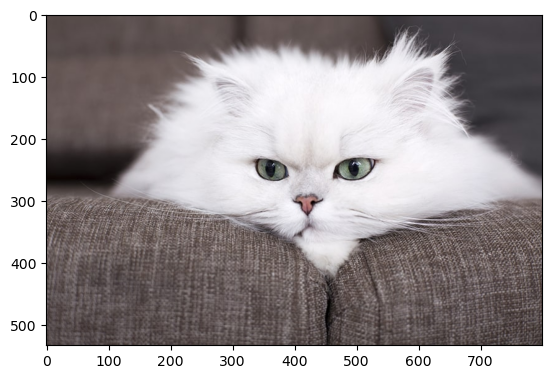

In [63]:
img1 = mpimg.imread(IMAGE_PATH)
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [64]:
img1.shape

(533, 800, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

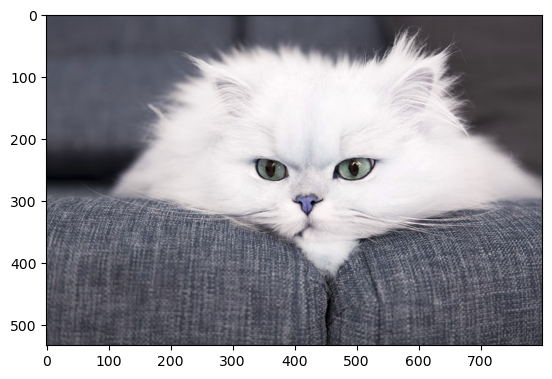

In [65]:
img2 = cv2.imread(IMAGE_PATH)
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). 

Let's fix that

AxesImage(shape=(533, 800, 3))


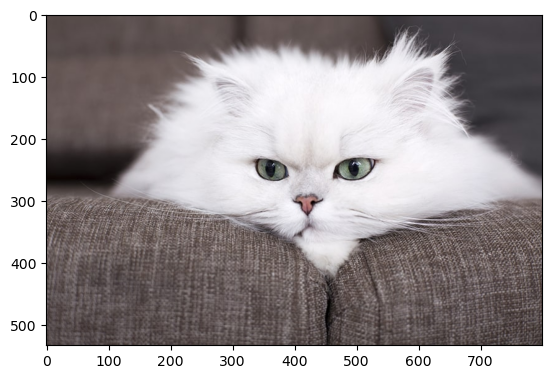

In [66]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


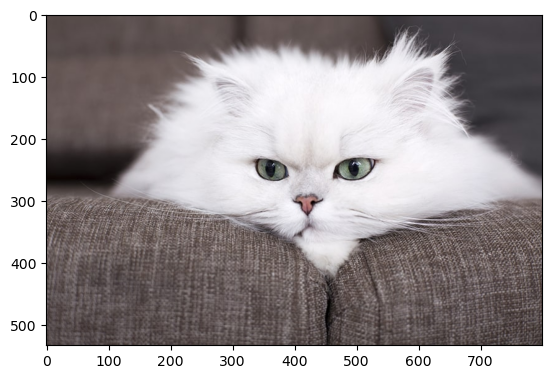

In [67]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open(IMAGE_PATH)
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [68]:
img3 = np.array(img3)
img3.shape

(533, 800, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

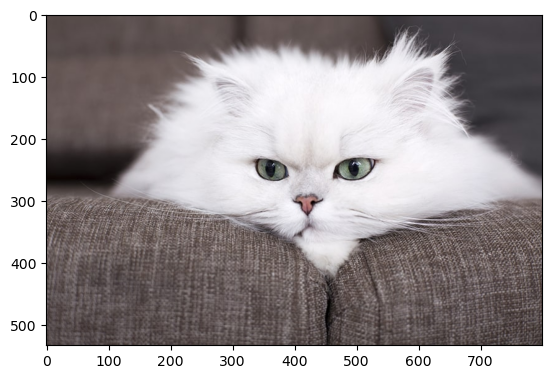

In [69]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it. 

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 800 x 533
New size: 200 x 200


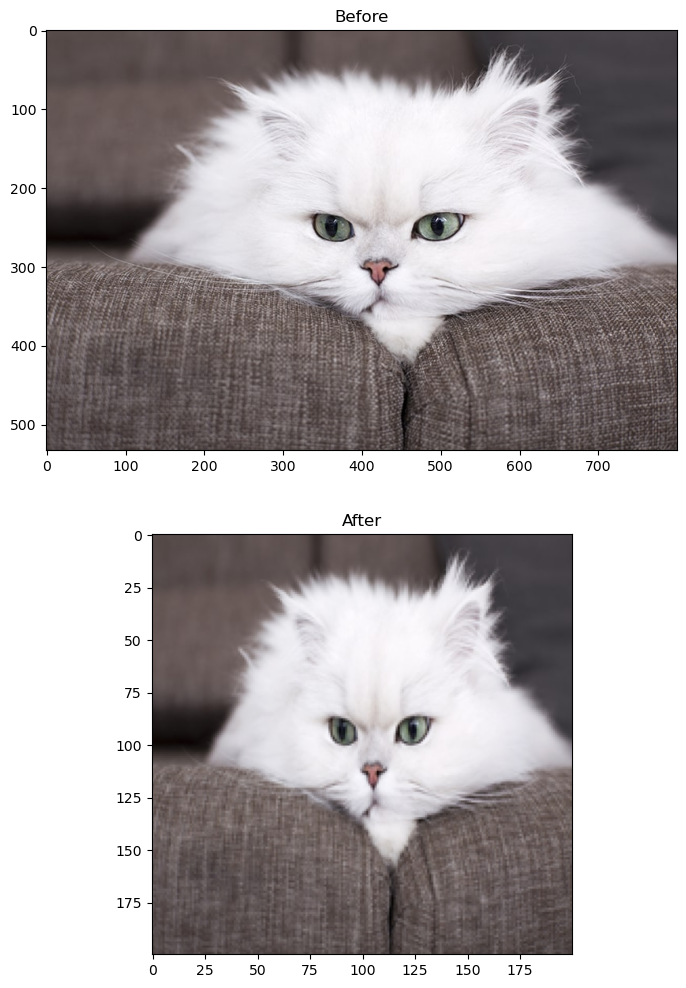

In [70]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 800 x 533
Scaled size: 200 x 133
New size: 200 x 200


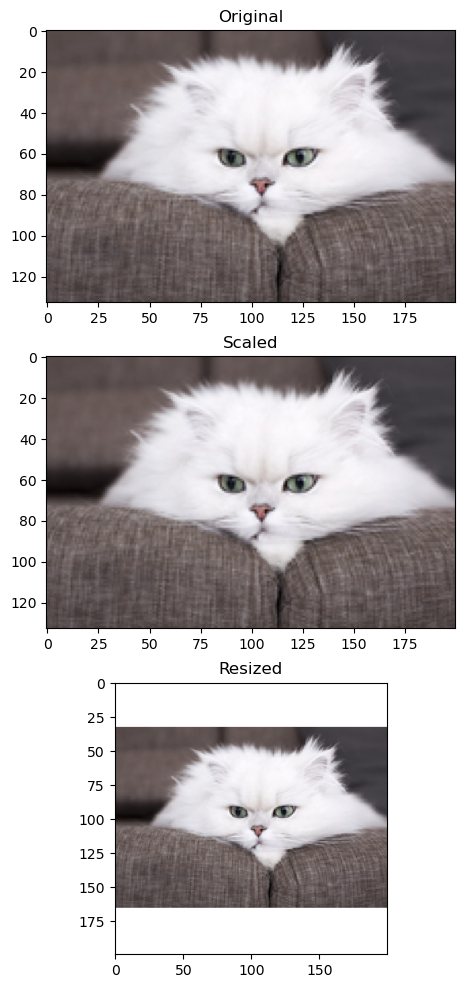

In [71]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (BIT_RANGE, BIT_RANGE, BIT_RANGE))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [72]:
orig_img = cv2.imread(IMAGE_PATH)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = BIT_RANGE - orig_img

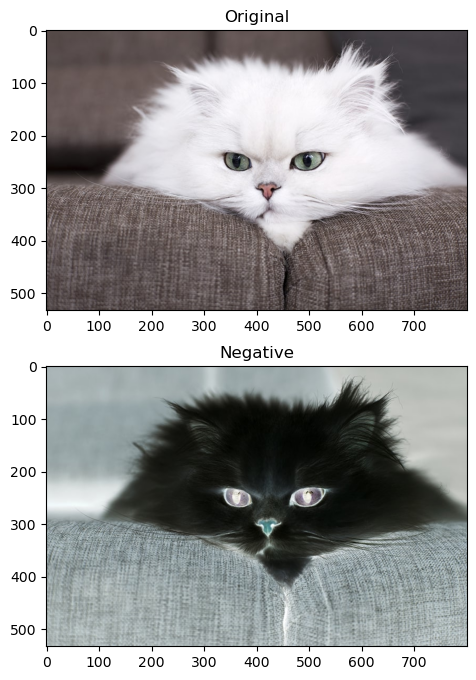

In [73]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = BIT_RANGE / (log (1 + $ max input pixel value $))$

In [74]:
orig_img = cv2.imread(IMAGE_PATH)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = BIT_RANGE / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

/var/folders/z9/f0yqbv7s16nc_qszsmqt43y40000gs/T/ipykernel_98110/3970956710.py:6: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(orig_img + 1))
/var/folders/z9/f0yqbv7s16nc_qszsmqt43y40000gs/T/ipykernel_98110/3970956710.py:10: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype = np.uint8)


Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

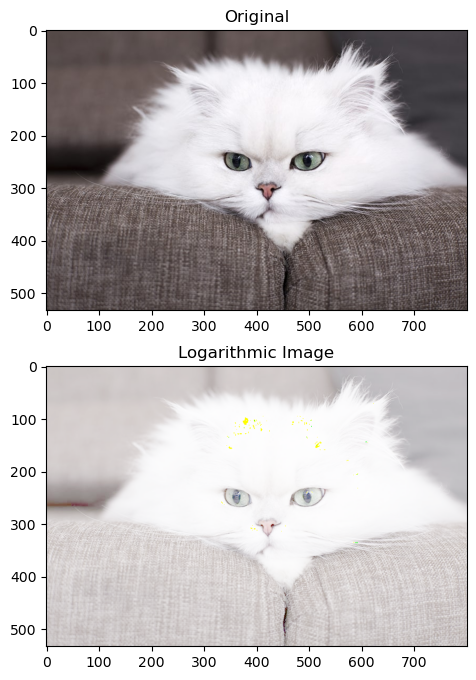

In [75]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

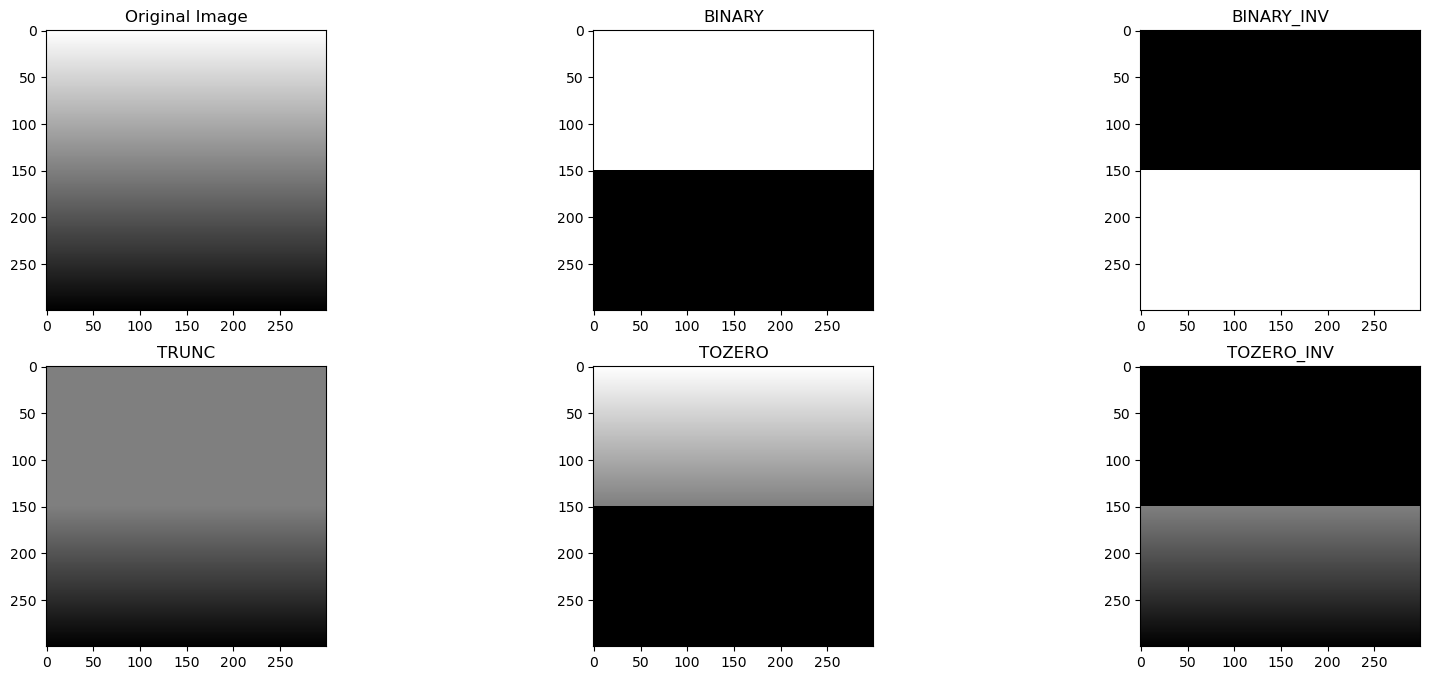

In [76]:
orig_img = cv2.imread(GRADIENT_IMAGE_PATH)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,BIT_RANGE,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,BIT_RANGE,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,BIT_RANGE,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,BIT_RANGE,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,BIT_RANGE,cv2.THRESH_TOZERO_INV)
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

Color quantization is a process of reducing the number of distinct colors in an image while preserving its overall appearance. This is commonly done to reduce the memory or storage requirements of an image, particularly in scenarios where a limited color palette is acceptable.

The purpose of color quantization is often to reduce the size of an image while maintaining a visually acceptable level of quality. By using a smaller number of representative colors, the image file size can be reduced, which is useful in scenarios where storage or bandwidth is limited.
Additionally, color quantization can be employed for image processing tasks, such as segmentation or feature extraction, where a reduced color palette simplifies the analysis.

In [77]:
def colorQuant(Z, K, criteria):
   # Generate a quantized image using KMeans.
   _, label, center = cv2.kmeans(Z ,K ,None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
   
   # Now convert back into uint8, and make original image.
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2

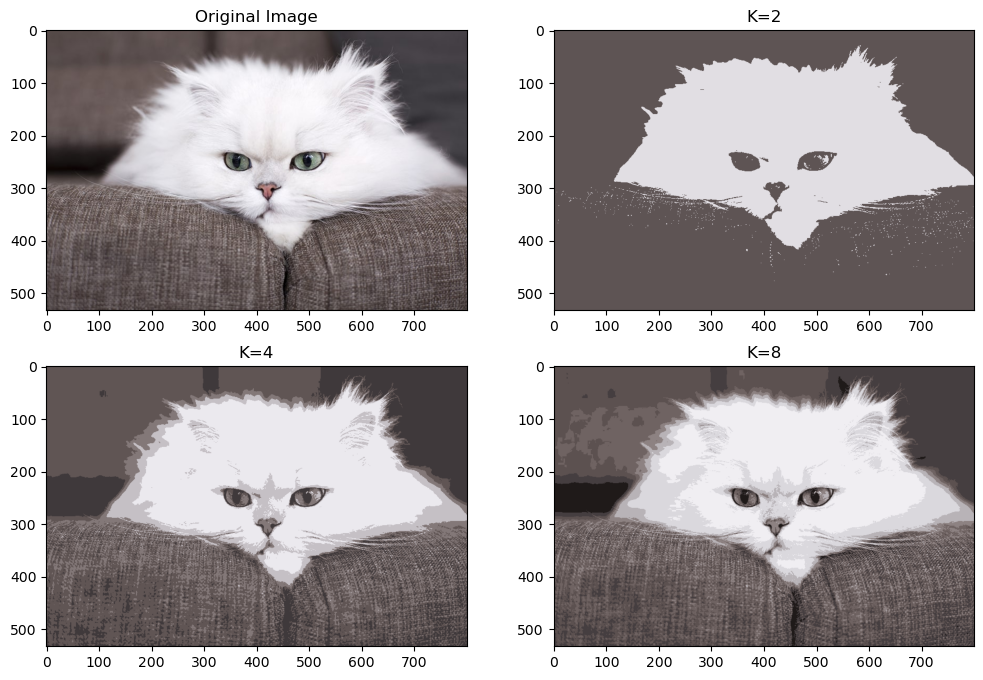

In [78]:
orig_img = cv2.imread(IMAGE_PATH)

infer_size = -1
rgb_dimensions = 3

Z = orig_img.reshape((infer_size, rgb_dimensions))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
iterations = 10
accuracy = 1.0

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterations, accuracy)

low_resolution_k = 2
medium_resolution_k = 5
high_resolution_k = 8

res1 = colorQuant(Z, low_resolution_k, criteria)
res2 = colorQuant(Z, medium_resolution_k, criteria)
res3 = colorQuant(Z, high_resolution_k, criteria)

# Display the results.

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

## Homework: Additional exercises  <a class="anchor" id="homework"></a>

### 1. Pixel-by-pixel transformations are widely used to increase the number of images to train artificial intelligence models, especially those of the photometric type. Investigate 3 types of transformations and apply them in the Google Collab project on your own images.

In [79]:
def display_image(img):
    plt.imshow(img)

#### 1.1 Brightness and contrast manipulation

Adjusting image brightness enhances models' adaptability to varied lighting conditions. This augmentation boosts performance in tasks like object recognition.

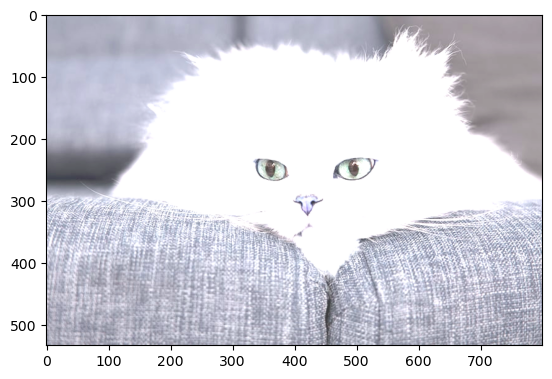

In [80]:
image = cv2.imread(IMAGE_PATH)

contrast = 1.5
brightness = 60
transformed_image = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

display_image(transformed_image)


#### 1.2 Rotation

Random or systematic image rotations augment AI datasets, making models invariant to rotation and improving accuracy in tasks like object recognition.

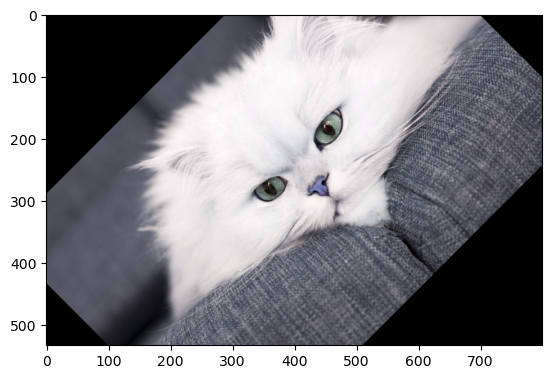

In [81]:
angle = 45
rows, cols, _ = image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

display_image(rotated_image)


#### 1.2 Noise manipulation

Introducing controlled noise during AI training, like Gaussian or salt-and-pepper noise, ensures models' resilience to real-world variations, preventing overfitting.

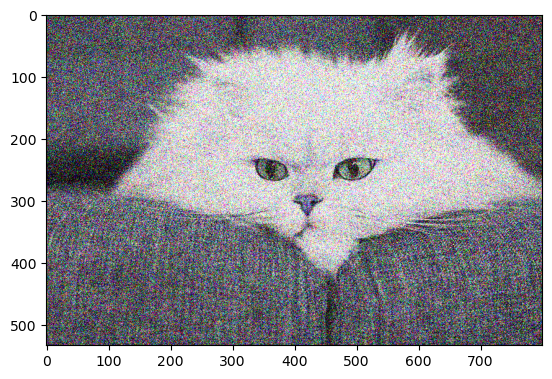

In [82]:
mean = 0 # In the case of Gaussian noise, a mean of 0 implies that, on average, the noise has no impact on the overall brightness of the image.
std_dev = 80 # Actual noise.
row, col, _ = image.shape
gaussian = np.random.normal(mean, std_dev, (row, col, 3))
noisy_image = np.clip(image + gaussian, 0, BIT_RANGE).astype(np.uint8)

display_image(noisy_image)

### 2. Investigate an application where obtaining the image negative has a specific value and integrate the code into the Google Collab notebook, briefly justifying your research and making a simple demo.

In [83]:
def init_plt_figure(figure_size):
    plt.figure(figsize=figure_size)

def display_grid_image(image, subplot_coordinates, title):
    plt.subplot(subplot_coordinates[0],
                subplot_coordinates[1],
                subplot_coordinates[2])
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")

def commit_plt_figure():
    plt.show()

The negative transformation is applied in image processing as a technique to enhance certain features, and it finds application in edge detection algorithms. By subtracting pixel values from the maximum intensity, the negative transformation accentuates intensity differences, potentially making edges more distinguishable. In edge detection, algorithms like Canny, Sobel, or Prewitt aim to identify rapid intensity changes, indicative of object boundaries.

In the following example, we'll use the Canny edge detector from OpenCV. We'll apply the negative transformation to the image and then detect edges,as the negative transformation helps the edge detection algorithm focus on specific features.

In [84]:
image = cv2.imread(IMAGE_PATH)

negative_img = BIT_RANGE - image

edges_negative = cv2.Canny(negative_img, 50, 150)

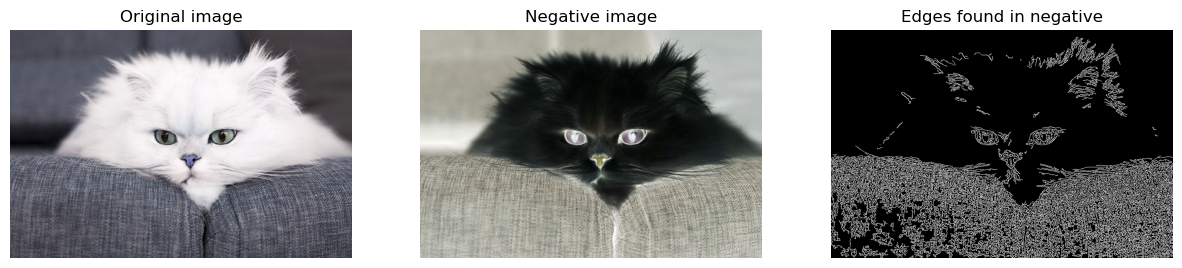

In [85]:
init_plt_figure((15, 4))

display_grid_image(image, (1, 3, 1), "Original image")
display_grid_image(negative_img, (1, 3, 2), "Negative image")
display_grid_image(edges_negative, (1, 3, 3), "Edges found in negative")

commit_plt_figure()

A differen ans simpler approach is thresholding, which is a fundamental image processing technique used to segment regions based on intensity values. In the context of edge detection, a simple thresholding approach is applied to binary images derived from the original and negative transformations. This method involves setting a threshold intensity level, categorizing pixel values above the threshold as one class (e.g., edges) and values below as another (e.g., background).

Thresholding applications to edge detection can be effective in scenarios where edges are characterized by distinct intensity contrasts. In the follwing example, we'll use thresholding to showcase differences in the binary representation of edges between the original and negative images.

In [86]:
_, thresh_negative = cv2.threshold(negative_img, np.ceil(BIT_RANGE/2), BIT_RANGE, cv2.THRESH_BINARY)

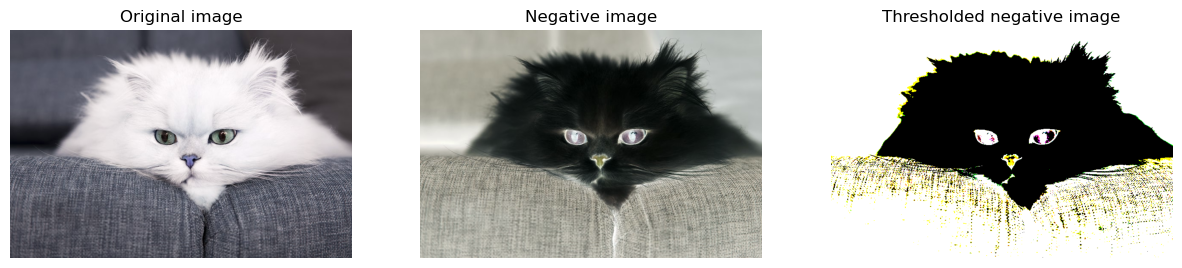

In [87]:
init_plt_figure((15, 4))

display_grid_image(image, (1, 3, 1), "Original image")
display_grid_image(negative_img, (1, 3, 2), "Negative image")
display_grid_image(thresh_negative, (1, 3, 3), "Thresholded negative image")

commit_plt_figure()

### 3. Investigate an application where gamma correction can be applied to an image. Integrate the code into the Google Collab notebook, briefly justify your research and make a simple demo.

In [88]:
# TODO

### 4. Investigate an application where image subtraction can be used and integrate the code into the Google Collab notebook, briefly justify your research, making a simple demo.

In [ ]:
# TODO